In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv(r"C:\Users\uyenn\Downloads\building_inventory.csv", na_values ={
    "Year Acquired": 0,
    "Year Constructed": 0,
    "Square Footage": 0,
})

In [5]:
df.columns

Index(['Agency Name', 'Location Name', 'Address', 'City', 'Zip code', 'County',
       'Congress Dist', 'Congressional Full Name', 'Rep Dist', 'Rep Full Name',
       'Senate Dist', 'Senator Full Name', 'Bldg Status', 'Year Acquired',
       'Year Constructed', 'Square Footage', 'Total Floors',
       'Floors Above Grade', 'Floors Below Grade', 'Usage Description',
       'Usage Description 2', 'Usage Description 3'],
      dtype='object')

In [8]:
df.dtypes

Agency Name                 object
Location Name               object
Address                     object
City                        object
Zip code                     int64
County                      object
Congress Dist                int64
Congressional Full Name     object
Rep Dist                     int64
Rep Full Name               object
Senate Dist                  int64
Senator Full Name           object
Bldg Status                 object
Year Acquired              float64
Year Constructed           float64
Square Footage             float64
Total Floors                 int64
Floors Above Grade           int64
Floors Below Grade           int64
Usage Description           object
Usage Description 2         object
Usage Description 3         object
dtype: object

In [9]:
df.shape

(8862, 22)

Question 1: For question 1, I use the scatter plot to plot the data in columm "Year Acquired" and "Year Constructed", with the marker representation as "o". I was able to represent the relationship between the "Year Constructed" and "Year Acquired", as communicated through the visualization. This question is very straightforward, and I was able to map out the relationship quite quickly. 

Text(0.5, 1.0, 'Relationship between Year Constructed and Year Acquired')

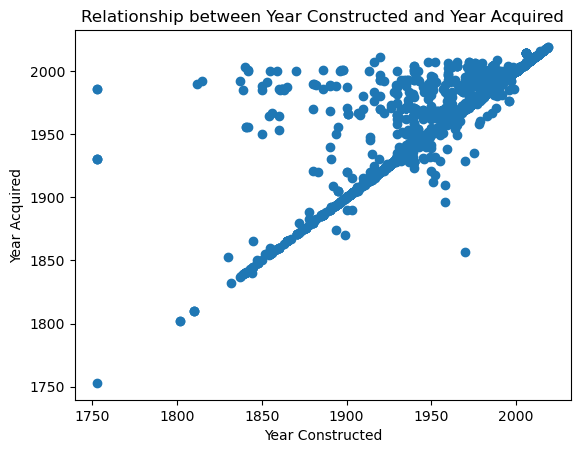

In [202]:
plt.plot(df["Year Constructed"], df["Year Acquired"], 'o')
plt.xlabel("Year Constructed")
plt.ylabel("Year Acquired")
plt.title("Relationship between Year Constructed and Year Acquired")

Question 2: For question 2, I group the data in Congress Dist together, and calculate the sum of square footage of the group for each district. Intially, I used a line graph to visualizae the data, however, after going to the office hour, I took the suggestion and change it to a bar graph instead. The bar graph visualization is more appropriate for this information because it communicates the sum of values for each data entry. 

In [11]:
sq_footage_per_distr = df.groupby("Congress Dist")["Square Footage"].sum()
print (sq_footage_per_distr)

Congress Dist
0       793124.0
1      2351762.0
2      6285684.0
3      1293687.0
4       317741.0
5      1809022.0
6       145659.0
7      9211651.0
8      1461548.0
9        77978.0
10      929267.0
11     3467894.0
12    12444775.0
13    31849251.0
14      857108.0
15     7209934.0
16     8725880.0
17     4347743.0
18     8120838.0
Name: Square Footage, dtype: float64


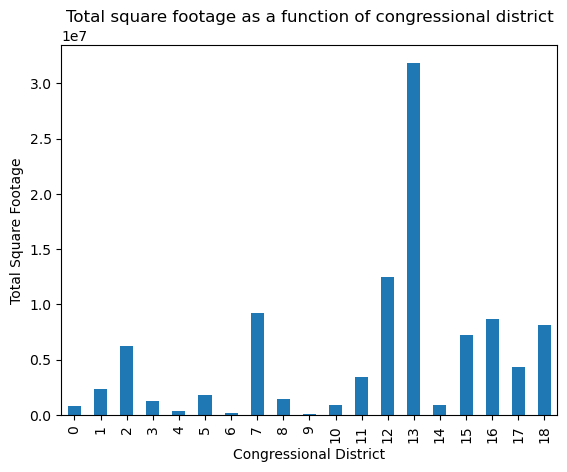

In [204]:
sq_footage_per_distr.plot(kind ='bar')
plt.ylabel("Total Square Footage")
plt.xlabel("Congressional District")
plt.title("Total square footage as a function of congressional district")

plt.show()

Question 3: First, I calculated the total of floors in each district (I used groupby function similar to question 2). After getting the total floor, I calculate the average sq footage per floor by dividing the total sq footage per district (result from question 2) and the total floor per district. Lastly, I plot that result using a bar graph. Similarly to question 2, I initally started out with a line graph, but it wasn't a good visualization of the data, thus I changed it to the bar graph, which did a good job of showing the sum of values for each district. 

In [13]:
total_sq_footage = (df["Square Footage"]).sum()
print (total_sq_footage)

101700546.0


In [14]:
floor_per_distr = df.groupby("Congress Dist")["Total Floors"].sum()
print(floor_per_distr)

Congress Dist
0      216
1      134
2      647
3       72
4       21
5      113
6       28
7      517
8      312
9       11
10     213
11     411
12    2339
13    2896
14     319
15    1872
16    1654
17     924
18    1800
Name: Total Floors, dtype: int64


In [15]:
sq_footage_floor = sq_footage_per_distr / floor_per_distr
print (sq_footage_floor)

Congress Dist
0      3671.870370
1     17550.462687
2      9715.122102
3     17967.875000
4     15130.523810
5     16009.044248
6      5202.107143
7     17817.506770
8      4684.448718
9      7088.909091
10     4362.755869
11     8437.698297
12     5320.553655
13    10997.669544
14     2686.858934
15     3851.460470
16     5275.622733
17     4705.349567
18     4511.576667
dtype: float64


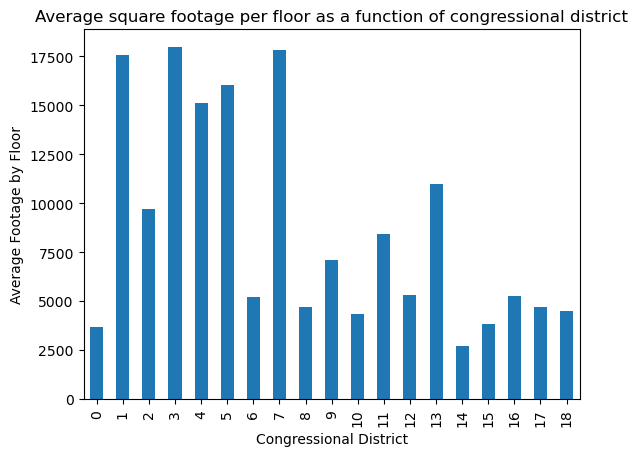

In [205]:
sq_footage_floor.plot(kind = 'bar')
plt.ylabel("Average Footage by Floor")
plt.xlabel("Congressional District")
plt.title("Average square footage per floor as a function of congressional district")

plt.show()

Question 4: This question is a bit challenging, and I was struggling with figuring out combine all the components I calculated into one single graph. I began by getting/counting the five most common/repeated department mame in the Agency Name columms, and I was able to get a splice of the 5 most common departments. Then I calculated the total square footage of each department, but I wasn't able to get the specific square footage of the 5 departments from before. This is what I was having a lot of trouble with, and I couldn't figure out how to do it correctly. I also calculated the total square footage by year with the groupby, but I couldn't get it to plot with the department. The visualization that I have currently is a representation of all departments over the years, and not the top 5 most common departments unfortunately

In [196]:
df["Agency Name"].unique()

array(['Department of Natural Resources', 'Department of Corrections',
       'Department of Human Services', 'Department of Transportation',
       'Department of State Police', 'Department of Military Affairs',
       'Department of Agriculture', 'Governors State University',
       'Department of Central Management Services',
       'Illinois State University', 'Historic Preservation Agency',
       'Department of Juvenile Justice', 'Southern Illinois University',
       'Illinois Medical District Commission', 'University of Illinois',
       "Department of Veterans' Affairs", 'Chicago State University',
       'Northern Illinois University', 'Office of the Secretary of State',
       'Illinois Emergency Management Agency',
       'Western Illinois University', 'Eastern Illinois University',
       'Northeastern Illinois University',
       'Illinois Community College Board',
       'Illinois Board of Higher Education',
       'IL State Board of Education', 'Department of Revenue',


In [197]:
dept_top_five = df["Agency Name"].value_counts().iloc[:5]
print (dept_top_five)

Department of Natural Resources    3223
Department of Corrections          1428
Department of Transportation       1137
Department of Human Services        617
University of Illinois              525
Name: Agency Name, dtype: int64


In [198]:
sq_footage_per_dept = df.groupby("Agency Name")["Square Footage"].sum()
print(sq_footage_per_dept)

Agency Name
Appellate Court / Fifth District                15124.0
Appellate Court / Fourth District               16400.0
Appellate Court / Second District               43330.0
Appellate Court / Third District                18700.0
Chicago State University                      1219492.0
Department of Agriculture                     2608398.0
Department of Central Management Services     4260911.0
Department of Corrections                    15120750.0
Department of Human Services                  8466774.0
Department of Juvenile Justice                1147982.0
Department of Military Affairs                4579470.0
Department of Natural Resources               3937319.0
Department of Public Health                      7160.0
Department of Revenue                          913236.0
Department of State Police                     828851.0
Department of Transportation                  5659737.0
Department of Veterans' Affairs               1483981.0
Eastern Illinois University         

In [199]:
sq_footage_per_year = df.groupby("Year Acquired")["Square Footage"].sum()
print(sq_footage_per_year)

Year Acquired
1753.0      1200.0
1802.0      4440.0
1810.0      4033.0
1832.0    120000.0
1837.0     10302.0
            ...   
2015.0    305093.0
2016.0    304839.0
2017.0      6720.0
2018.0     17160.0
2019.0      1520.0
Name: Square Footage, Length: 171, dtype: float64


In [200]:
sq_footage_per_dept_per_year = df.groupby(["Agency Name", "Year Acquired"])["Square Footage"].sum()
print(sq_footage_per_dept_per_year)

Agency Name                        Year Acquired
Appellate Court / Fifth District   1857.0            15124.0
Appellate Court / Fourth District  1967.0            16400.0
Appellate Court / Second District  1967.0            43330.0
Appellate Court / Third District   1858.0            15000.0
                                   1860.0             3700.0
                                                      ...   
Western Illinois University        2007.0             9732.0
                                   2010.0             1200.0
                                   2012.0            60300.0
                                   2014.0           264870.0
                                   2015.0           106120.0
Name: Square Footage, Length: 1171, dtype: float64


<Axes: xlabel='Agency Name,Year Acquired'>

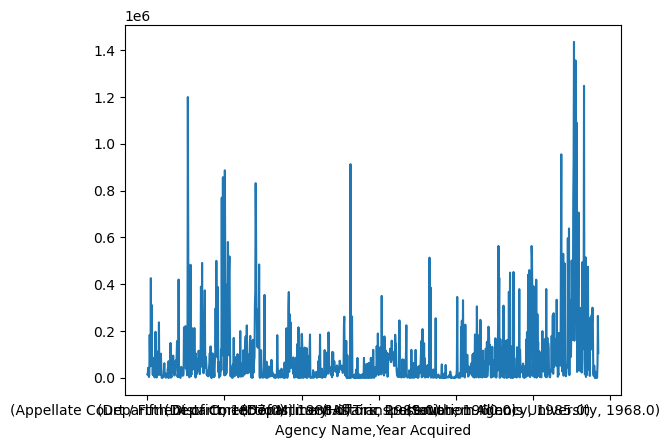

In [207]:
sq_footage_per_dept_per_year.plot()